## Imports

In [1]:
import os
import shutil
from pathlib import Path
import pandas as pd
import dataframe_image as dfi
import numpy as np

from src.database import *
import matplotlib.pyplot as plt
plt.style.use('custom_matplotlibrc')
plt.rcParams["figure.figsize"] = (20,5)
fig_id = 0

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 1)


## Configurations

In [2]:
database_path = Path('databases/3T_human_T1maps_database.pkl')


## Load database

In [3]:
df = pd.read_pickle(database_path)

## Prepare stats table

In [4]:
columns = [
    'genu WM',
    'splenium WM',
    'cortical GM',
    'deep GM'
]

col_vals = [
    None,
    None,
    None,
    None
]

df_setup = {
    'all submissions mean T1': col_vals,
    'inter-submission mean T1': col_vals,
    'intra-submission mean T1': col_vals,
    'all submissions T1 STD': col_vals,
    'inter-submission T1 STD': col_vals,
    'intra-submission T1 STD': col_vals,
    'all submissions COV [%]': col_vals,
    'inter-submission COV [%]': col_vals,
    'intra-submission COV [%]': col_vals
}

stats_table = pd.DataFrame.from_dict(df_setup, orient='index', columns=columns)

## All submissions

In [5]:
genu_estimate = np.array([])
genu_std = np.array([])
splenium_estimate = np.array([])
splenium_std = np.array([])
deepgm_estimate = np.array([])
deepgm_std = np.array([])
cgm_estimate = np.array([])
cgm_std = np.array([])

ii = 0
for index, row in df.iterrows():
    
    genu_estimate = np.append(genu_estimate, np.mean(df.loc[index]['T1 - genu (WM)']))
    splenium_estimate = np.append(splenium_estimate, np.mean(df.loc[index]['T1 - splenium (WM)']))
    deepgm_estimate = np.append(deepgm_estimate, np.mean(df.loc[index]['T1 - deep GM']))
    cgm_estimate = np.append(cgm_estimate, np.mean(df.loc[index]['T1 - cortical GM']))

    ii = ii +1

/Users/mathieuboudreau/opt/anaconda3/envs/analysis_arm/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mathieuboudreau/opt/anaconda3/envs/analysis_arm/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [6]:
stats_table['genu WM']['all submissions mean T1'] = np.nanmean(genu_estimate)
stats_table['genu WM']['all submissions T1 STD'] = np.nanstd(genu_estimate)
stats_table['genu WM']['all submissions COV [%]'] = np.divide(np.nanstd(genu_estimate),np.nanmean(genu_estimate)) * 100

stats_table['splenium WM']['all submissions mean T1'] = np.nanmean(splenium_estimate)
stats_table['splenium WM']['all submissions T1 STD'] = np.nanstd(splenium_estimate)
stats_table['splenium WM']['all submissions COV [%]'] = np.divide(np.nanstd(splenium_estimate),np.nanmean(splenium_estimate)) * 100

stats_table['cortical GM']['all submissions mean T1'] = np.nanmean(cgm_estimate)
stats_table['cortical GM']['all submissions T1 STD'] = np.nanstd(cgm_estimate)
stats_table['cortical GM']['all submissions COV [%]'] = np.divide(np.nanstd(cgm_estimate),np.nanmean(cgm_estimate)) * 100

stats_table['deep GM']['all submissions mean T1'] = np.nanmean(deepgm_estimate)
stats_table['deep GM']['all submissions T1 STD'] = np.nanstd(deepgm_estimate)
stats_table['deep GM']['all submissions COV [%]'] = np.divide(np.nanstd(deepgm_estimate),np.nanmean(deepgm_estimate)) * 100



## Inter-submision stats
One subject/measurement per submission were selected. The protocol closest to the proposed one was selected, preferring complex data over magnitude-only.

In [7]:
# Selecting one subject/measurement per submission, protocol closest to proposed, complex if available.
ids_intersubmissions = (
    1.001,
    2.003,
    3.001,
    5.001,
    6.001,
    7.001,
    8.002,
    9.001,
)

genu_estimate = np.array([])
genu_std = np.array([])
splenium_estimate = np.array([])
splenium_std = np.array([])
deepgm_estimate = np.array([])
deepgm_std = np.array([])
cgm_estimate = np.array([])
cgm_std = np.array([])

ii = 0
for index in ids_intersubmissions:
    
    genu_estimate = np.append(genu_estimate, np.mean(df.loc[index]['T1 - genu (WM)']))
    splenium_estimate = np.append(splenium_estimate, np.mean(df.loc[index]['T1 - splenium (WM)']))
    deepgm_estimate = np.append(deepgm_estimate, np.mean(df.loc[index]['T1 - deep GM']))
    cgm_estimate = np.append(cgm_estimate, np.mean(df.loc[index]['T1 - cortical GM']))
    
    ii = ii +1


In [8]:
stats_table['genu WM']['inter-submission mean T1'] = np.nanmean(genu_estimate)
stats_table['genu WM']['inter-submission T1 STD'] = np.nanstd(genu_estimate)
stats_table['genu WM']['inter-submission COV [%]'] = np.divide(np.nanstd(genu_estimate),np.nanmean(genu_estimate)) * 100

stats_table['splenium WM']['inter-submission mean T1'] = np.nanmean(splenium_estimate)
stats_table['splenium WM']['inter-submission T1 STD'] = np.nanstd(splenium_estimate)
stats_table['splenium WM']['inter-submission COV [%]'] = np.divide(np.nanstd(splenium_estimate),np.nanmean(splenium_estimate)) * 100

stats_table['cortical GM']['inter-submission mean T1'] = np.nanmean(cgm_estimate)
stats_table['cortical GM']['inter-submission T1 STD'] = np.nanstd(cgm_estimate)
stats_table['cortical GM']['inter-submission COV [%]'] = np.divide(np.nanstd(cgm_estimate),np.nanmean(cgm_estimate)) * 100

stats_table['deep GM']['inter-submission mean T1'] = np.nanmean(deepgm_estimate)
stats_table['deep GM']['inter-submission T1 STD'] = np.nanstd(deepgm_estimate)
stats_table['deep GM']['inter-submission COV [%]'] = np.divide(np.nanstd(deepgm_estimate),np.nanmean(deepgm_estimate)) * 100



In [9]:
genu_estimate_inter = genu_estimate
splenium_estimate_inter = splenium_estimate
deepgm_estimate_inter = deepgm_estimate
cgm_estimate_inter = cgm_estimate

## Intra-submision stats
All unique T1 maps from Site 9 were used for the stats calculations. Site 9 acquired maps on 3 different scanners, 2 different vendors.

In [10]:
# Selecting one submission
ids_intrasubmissions = (
9.001,
9.006,
9.007,
9.009,
9.01,
9.012,
9.013,
9.015,
9.016,
9.018,
9.019,
9.02,
9.021,
9.023,
9.025,
9.027,
9.028,
9.03,
9.031,
9.033,
9.034,
9.036,
9.037
)

genu_estimate = np.array([])
genu_std = np.array([])
splenium_estimate = np.array([])
splenium_std = np.array([])
deepgm_estimate = np.array([])
deepgm_std = np.array([])
cgm_estimate = np.array([])
cgm_std = np.array([])

ii = 0
for index in ids_intrasubmissions:
    
    genu_estimate = np.append(genu_estimate, np.mean(df.loc[index]['T1 - genu (WM)']))
    splenium_estimate = np.append(splenium_estimate, np.mean(df.loc[index]['T1 - splenium (WM)']))
    deepgm_estimate = np.append(deepgm_estimate, np.mean(df.loc[index]['T1 - deep GM']))
    cgm_estimate = np.append(cgm_estimate, np.mean(df.loc[index]['T1 - cortical GM']))

    ii = ii +1



In [11]:
stats_table['genu WM']['intra-submission mean T1'] = np.nanmean(genu_estimate)
stats_table['genu WM']['intra-submission T1 STD'] = np.nanstd(genu_estimate)
stats_table['genu WM']['intra-submission COV [%]'] = np.divide(np.nanstd(genu_estimate),np.nanmean(genu_estimate)) * 100

stats_table['splenium WM']['intra-submission mean T1'] = np.nanmean(splenium_estimate)
stats_table['splenium WM']['intra-submission T1 STD'] = np.nanstd(splenium_estimate)
stats_table['splenium WM']['intra-submission COV [%]'] = np.divide(np.nanstd(splenium_estimate),np.nanmean(splenium_estimate)) * 100

stats_table['cortical GM']['intra-submission mean T1'] = np.nanmean(cgm_estimate)
stats_table['cortical GM']['intra-submission T1 STD'] = np.nanstd(cgm_estimate)
stats_table['cortical GM']['intra-submission COV [%]'] = np.divide(np.nanstd(cgm_estimate),np.nanmean(cgm_estimate)) * 100

stats_table['deep GM']['intra-submission mean T1'] = np.nanmean(deepgm_estimate)
stats_table['deep GM']['intra-submission T1 STD'] = np.nanstd(deepgm_estimate)
stats_table['deep GM']['intra-submission COV [%]'] = np.divide(np.nanstd(deepgm_estimate),np.nanmean(deepgm_estimate)) * 100



In [12]:
genu_estimate_intra = genu_estimate
splenium_estimate_intra = splenium_estimate
deepgm_estimate_intra = deepgm_estimate
cgm_estimate_intra = cgm_estimate

## Display table

In [13]:
display(stats_table)

,genu WM,splenium WM,cortical GM,deep GM
all submissions mean T1,827.9,854.0,1548.4,1188.4
inter-submission mean T1,840.6,875.6,1568.0,1268.2
intra-submission mean T1,820.1,843.4,1589.5,1199.3
all submissions T1 STD,37.5,49.6,155.5,132.6
inter-submission T1 STD,50.4,96.3,258.6,278.5
intra-submission T1 STD,26.3,28.6,111.0,85.2
all submissions COV [%],4.5,5.8,10.0,11.2
inter-submission COV [%],6.0,11.0,16.5,22.0
intra-submission COV [%],3.2,3.4,7.0,7.1


## Export

In [14]:
pwd = os.getcwd()
folder_path = Path("plots/09_human_stats/")
dfi.export(stats_table, 'human_stats.png')

shutil.move('human_stats.png', Path(pwd) / folder_path / 'human_stats.png')


[1126/235459.511879:WARNING:angle_platform_impl.cc(49)] RendererVk.cpp:1962 (initialize): ANGLE VMA version: 2003000
62807 bytes written to file /var/folders/l1/1xswjffd73l8yp7dd7pq9lyw0000gn/T/tmpeedhocla/temp.png


PosixPath('/Users/mathieuboudreau/neuropoly/github/analysis/plots/09_human_stats/human_stats.png')

In [17]:
## Violin plots

/var/folders/l1/1xswjffd73l8yp7dd7pq9lyw0000gn/T/ipykernel_54943/2399684766.py:16: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x='Region', y='T1 (ms)', hue='Type', data=df, split=True, inner="quartile", scale="count", palette="Set2")


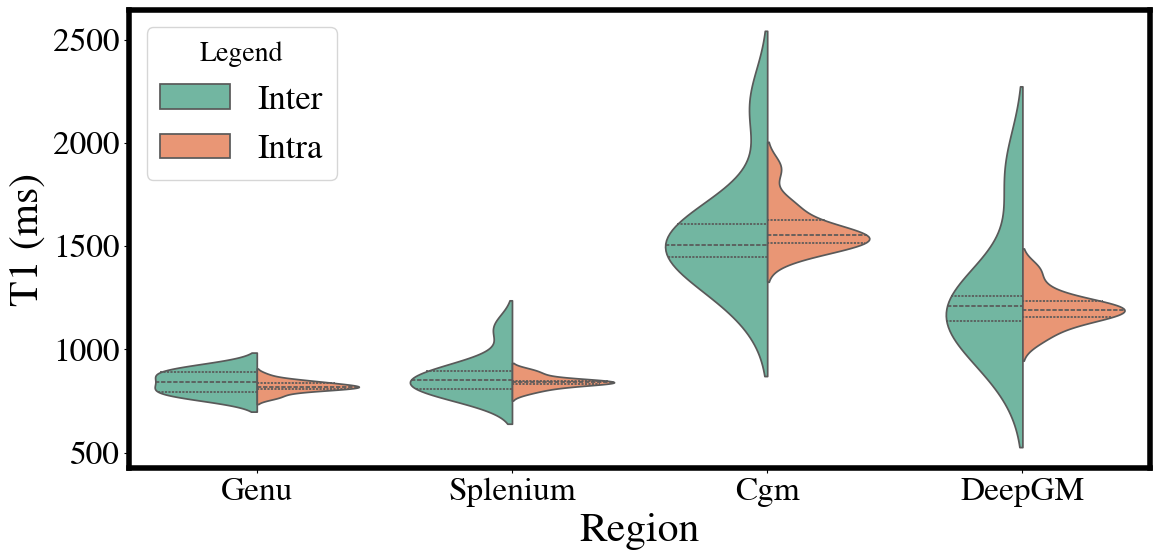

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Combine data into a single DataFrame
df = pd.DataFrame({
    'T1 (ms)': np.concatenate([genu_estimate_inter, genu_estimate_intra, splenium_estimate_inter, splenium_estimate_intra, cgm_estimate_inter, cgm_estimate_intra, deepgm_estimate_inter, deepgm_estimate_intra]),
    'Group': ['Genu'] * len(genu_estimate_inter) + ['Genu'] * len(genu_estimate_intra) + ['Splenium'] * len(splenium_estimate_inter) + ['Splenium'] * len(splenium_estimate_intra) + ['Cgm'] * len(cgm_estimate_inter) + ['Cgm'] * len(cgm_estimate_intra) + ['DeepGM'] * len(deepgm_estimate_inter) + ['DeepGM'] * len(deepgm_estimate_intra),
    'Type': ['Inter'] * len(genu_estimate_inter) + ['Intra'] * len(genu_estimate_intra) + ['Inter'] * len(splenium_estimate_inter) + ['Intra'] * len(splenium_estimate_intra) + ['Inter'] * len(cgm_estimate_inter) + ['Intra'] * len(cgm_estimate_intra) + ['Inter'] * len(deepgm_estimate_inter) + ['Intra'] * len(deepgm_estimate_intra),
    'Region': ['Genu'] * len(genu_estimate_inter) + ['Genu'] * len(genu_estimate_intra) + ['Splenium'] * len(splenium_estimate_inter) + ['Splenium'] * len(splenium_estimate_intra) + ['Cgm'] * len(cgm_estimate_inter) + ['Cgm'] * len(cgm_estimate_intra) + ['DeepGM'] * len(deepgm_estimate_inter) + ['DeepGM'] * len(deepgm_estimate_intra),
})

# Set the color palette
sns.set_palette("husl")

# Create a violin plot using seaborn
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Region', y='T1 (ms)', hue='Type', data=df, split=True, inner="quartile", scale="count", palette="Set2")


# Make the legend larger
ax.legend(loc='upper left', title="Legend", prop={'size':25})

# Show the plot
plt.show()